In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

## Reading Data

In [2]:
df=pd.read_csv('D:/sql/Data set/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Features Engineering

In [15]:
def plot_distribution_with_hue(df, x_column, hue_column):
   
    sns.displot(data=df, x=x_column, hue=hue_column, kde=True)
    plt.title(f"Distribution of {x_column.name} with respect to {hue_column.name}")
    plt.show()

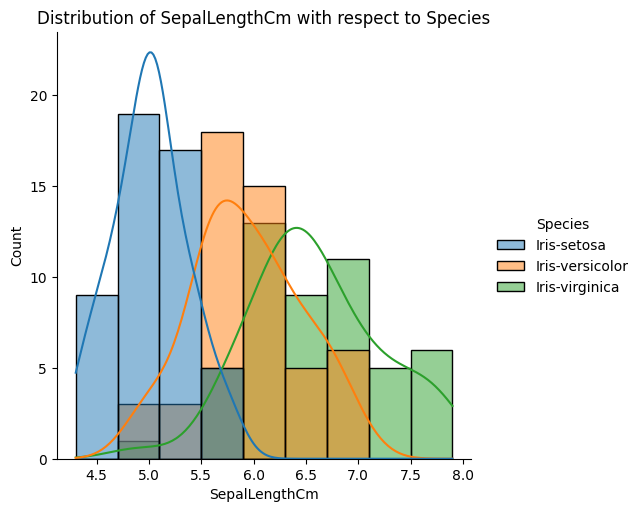

In [16]:
plot_distribution_with_hue(df,df['SepalLengthCm'],df['Species'])

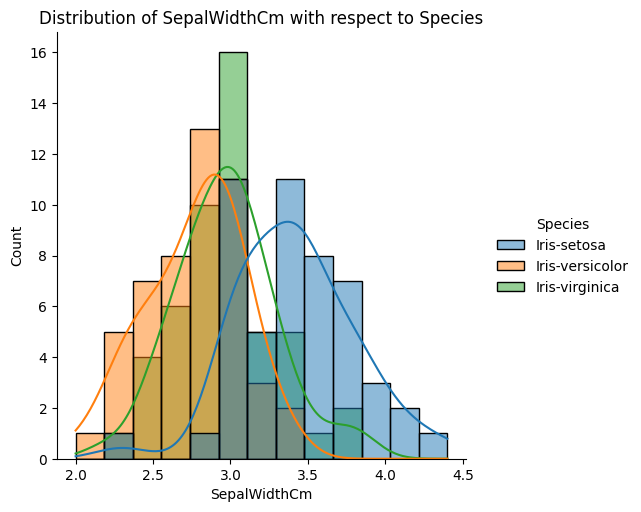

In [17]:
plot_distribution_with_hue(df,df['SepalWidthCm'],df['Species'])

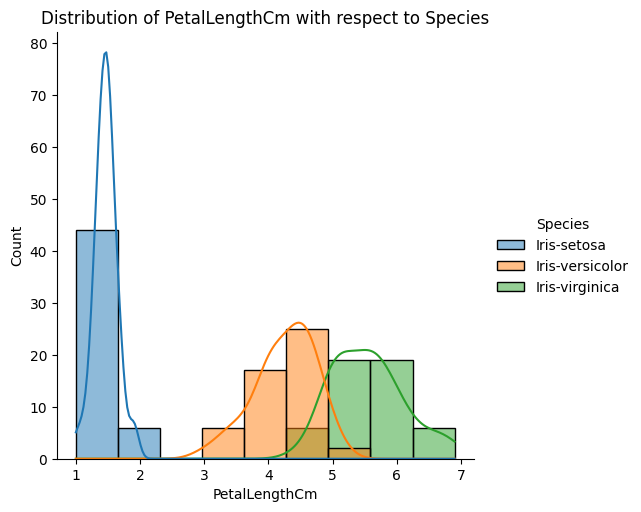

In [18]:
plot_distribution_with_hue(df,df['PetalLengthCm'],df['Species'])

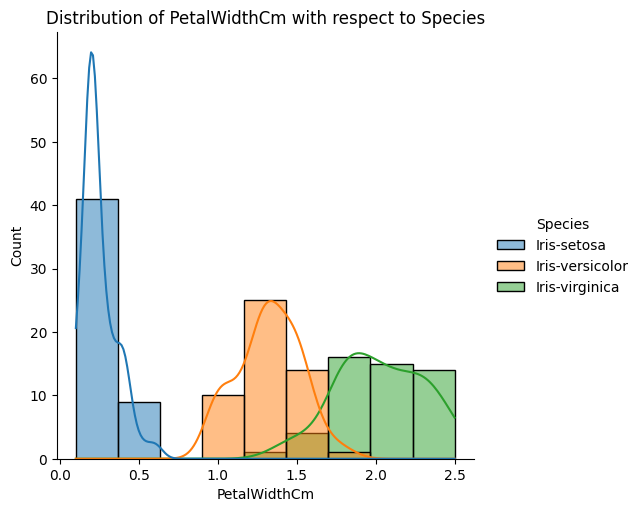

In [19]:
plot_distribution_with_hue(df,df['PetalWidthCm'],df['Species'])

In [22]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])

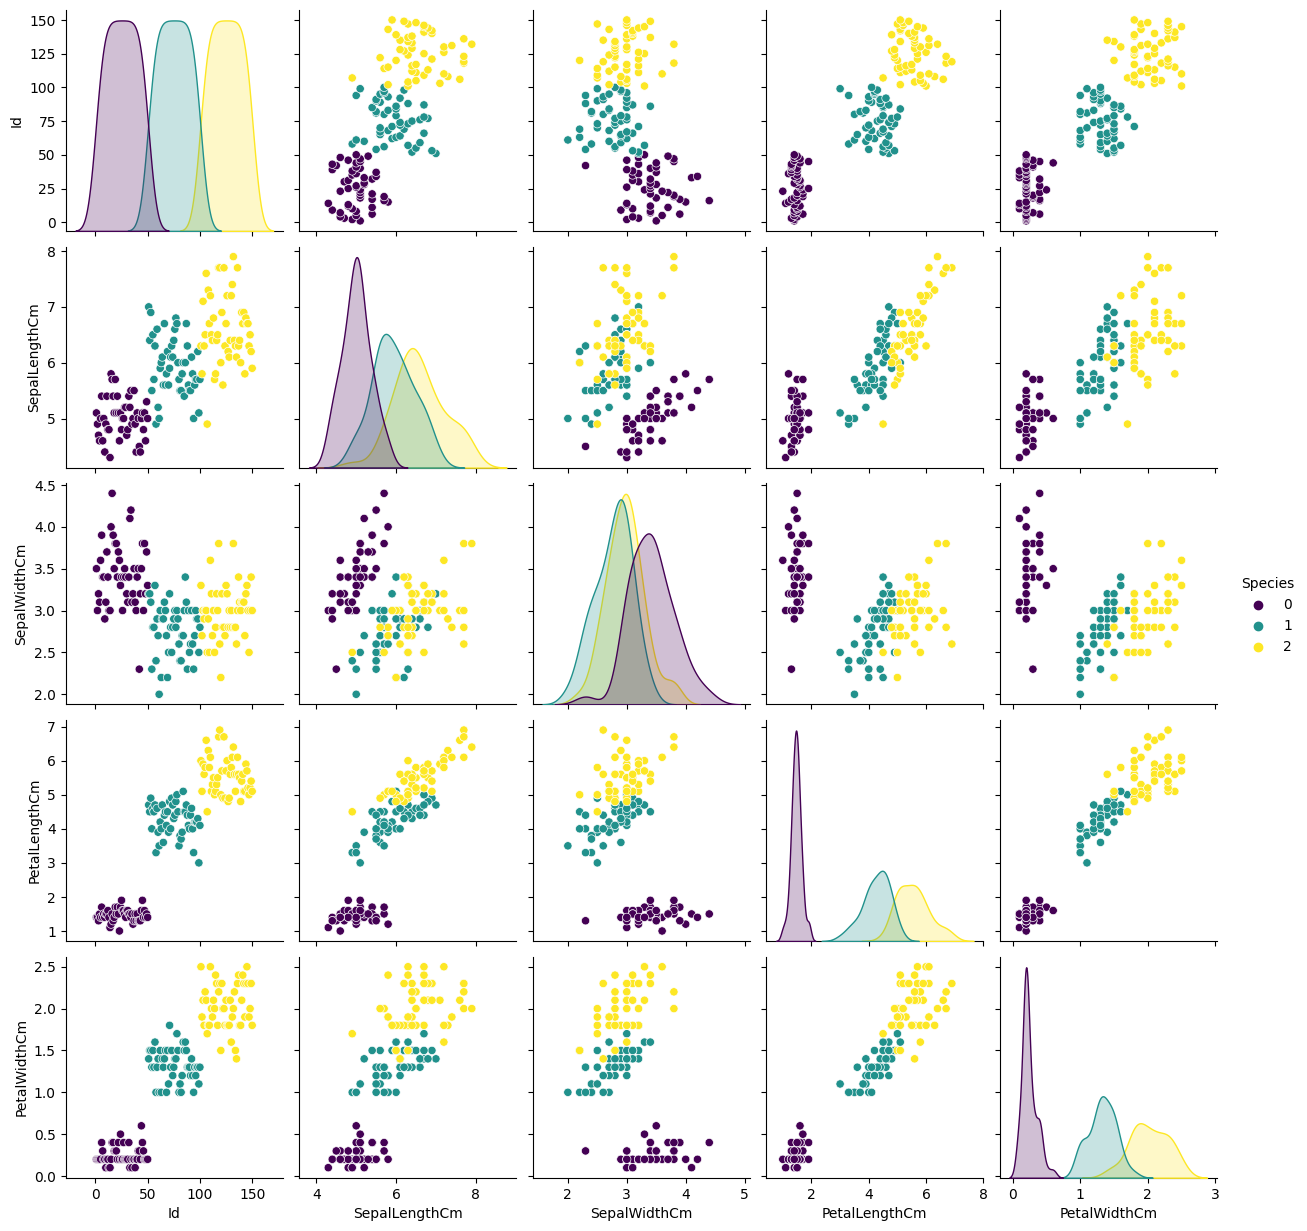

In [57]:
sns.pairplot(data=df,hue='Species',palette="viridis")

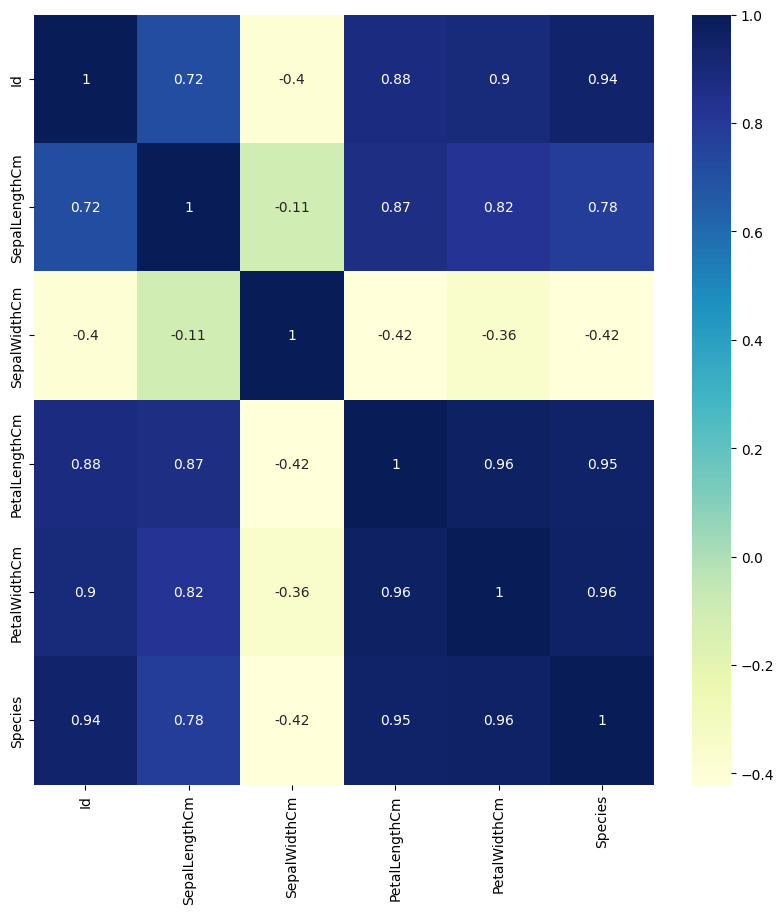

In [24]:
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix ,classification_report

## Data Spliting

In [34]:
X = df.drop(['Id','Species'],axis=1)
y = df['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=19)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


## Building & Evaluation Model

In [37]:
model = SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9523809523809523
0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.84      0.91        19
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.93        45
weighted avg       0.95      0.93      0.93        45

[[14  0  0]
 [ 0 16  3]
 [ 0  0 12]]


### Trying Cross Validation Or KFold Spliting

In [52]:
kf = StratifiedKFold(n_splits=5)
list_of_acc = []

for train_idx , test_idx in kf.split(X,y):
    train_data = X.iloc[train_idx].values
    test_data = X.iloc[test_idx].values
    train_y = y.iloc[train_idx]
    test_y = y.iloc[test_idx]
    
    model.fit(train_data,train_y)
    pred = model.predict(test_data)
    acc = accuracy_score(pred,test_y)
    list_of_acc.append(acc)

In [53]:
list_of_acc

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 1.0]

#### It's show almost no diffrenece